In [ ]:
#TRYING DIFFERENT METHODS OF TRACK DETECTION WITH OPENCV

#ORB:

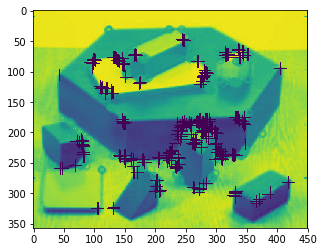

True

In [58]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('img/simple.jpg',0)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
#img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
cim = img.copy()
for marker in kp:
    cim = cv.drawMarker(cim, tuple(int(i) for i in marker.pt), color=(0, 255, 0))
    
plt.imshow(cim), plt.show()

cv.imwrite('img/simpleORB.jpg',img)

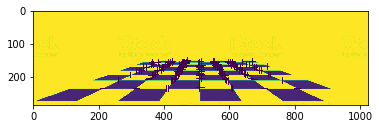

True

In [59]:
img = cv.imread('img/checker.jpg',0)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
#img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
cim = img.copy()
for marker in kp:
    cim = cv.drawMarker(cim, tuple(int(i) for i in marker.pt), color=(0, 255, 0))
    
plt.imshow(cim), plt.show()
cv.imwrite('img/checkerORB.jpg',img)

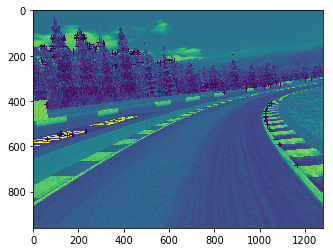

True

In [60]:
img = cv.imread('img/curvedtrack.jpg',0)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
#img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
cim = img.copy()
for marker in kp:
    cim = cv.drawMarker(cim, tuple(int(i) for i in marker.pt), color=(0, 255, 0))
    
plt.imshow(cim), plt.show()

cv.imwrite('img/curvedtrackORB.jpg',img)

In [61]:
#HARRIS CORNER DETECTION:

In [62]:
import numpy as np
import cv2 as cv

filename = 'img/curvedtrack.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,6,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,200]

cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()
    
cv.imwrite('img/curvedtrackHarris.jpg',img)

True

In [63]:
#FAST FEATURE DETECTION:

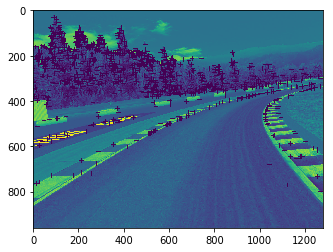

Threshold: 300
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 3092


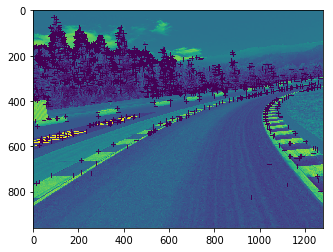

Total Keypoints without nonmaxSuppression: 6009


True

In [65]:
img = cv.imread('img/curvedtrack.jpg',0)

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create(300, 250)

# find and draw the keypoints
kp = fast.detect(img,None)
#img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cim = img.copy()
for marker in kp:
    cim = cv.drawMarker(cim, tuple(int(i) for i in marker.pt), color=(0, 255, 0))
    
plt.imshow(cim), plt.show()

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

cv.imwrite('fast_true.png',cim)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)

for marker in kp:
    cim = cv.drawMarker(cim, tuple(int(i) for i in marker.pt), color=(0, 255, 0))
plt.imshow(cim), plt.show()
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )

cv.imwrite('img/curvedtrackFAST.jpg',cim)